In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
import seaborn as sns

In [19]:
df1 = pd.read_csv('PositiveYValues.out', header=None)
df1 = df1.T

df2 = pd.read_csv('NegativeYValues.out', header=None)
df2 = df2.T

df1.columns =['yvalues']
df2.columns =['yvalues']

df3 = pd.concat([df2,df1],join="inner")
df3

,yvalues
0,0.815385
1,0.839286
2,0.930693
3,0.897436
4,0.880342
...,...
29,0.943548
30,0.899183
31,0.934783
32,0.883495


In [20]:
df1_error = pd.read_csv('errorsPositive.out', header=None)
df1_error = df1_error.T

df2_error = pd.read_csv('errorsNegative.out', header=None)
df2_error = df2_error.T

df1_error.columns =['error']
df2_error.columns =['error']

df3_error = pd.concat([df2_error,df1_error],join="inner")

In [22]:
mergeDF = pd.concat([df3,df3_error],axis=1)
mergeDF

,yvalues,error
0,0.815385,0.048124
1,0.839286,0.034703
2,0.930693,0.017870
3,0.897436,0.015363
4,0.880342,0.030006
...,...,...
29,0.943548,0.020726
30,0.899183,0.015717
31,0.934783,0.018202
32,0.883495,0.031612


In [23]:
xvalues = [-4.5,-4.0,-3.5,-3.0, 
-2.9,-2.8,-2.7,-2.6,-2.5,-2.4,-2.3,-2.2,-2.1,-2.0,
-1.9,-1.8,-1.7,-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,-1.0,
-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2, -0.1, 0,
0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.5,4.0,4.5,]

In [26]:
mergeDF['xvalues'] = xvalues
mergeDF 

,yvalues,error,xvalues
0,0.815385,0.048124,-4.5
1,0.839286,0.034703,-4.0
2,0.930693,0.017870,-3.5
3,0.897436,0.015363,-3.0
4,0.880342,0.030006,-2.9
...,...,...,...
29,0.943548,0.020726,2.9
30,0.899183,0.015717,3.0
31,0.934783,0.018202,3.5
32,0.883495,0.031612,4.0


In [55]:
xvaluesArray = mergeDF[['xvalues']].to_numpy()
xvaluesArray
yvaluesArray = mergeDF[['yvalues']].to_numpy()
yvaluesArray

errorArray = mergeDF[['error']].to_numpy()
errorArray.dtype

dtype('float64')

In [59]:
xvaluesArray = np.array(mergeDF['xvalues'])
yvaluesArray = np.array(mergeDF['yvalues'])
errorArray = np.array(mergeDF['error'])
errorArray

array([0.04812365, 0.03470349, 0.01786964, 0.01536268, 0.03000571,
       0.03272038, 0.02454928, 0.02083003, 0.01890844, 0.01723235,
       0.01419922, 0.01751775, 0.01698277, 0.01429796, 0.01315844,
       0.01172378, 0.01026941, 0.01039151, 0.00890219, 0.00839476,
       0.00741146, 0.00698876, 0.00622617, 0.00591374, 0.00522084,
       0.00553299, 0.00576442, 0.00577805, 0.00641114, 0.00678998,
       0.00745243, 0.00819913, 0.0392613 , 0.02738613, 0.01769039,
       0.0389973 , 0.0079421 , 0.00749792, 0.00664994, 0.0060321 ,
       0.00568595, 0.00540433, 0.00528192, 0.00508585, 0.00545038,
       0.00619132, 0.0068909 , 0.00698235, 0.00812309, 0.00853496,
       0.00973601, 0.01035942, 0.01065333, 0.01112651, 0.01374141,
       0.0134932 , 0.01491528, 0.01807974, 0.01734494, 0.01511035,
       0.0208497 , 0.02156076, 0.02087232, 0.02072571, 0.0157166 ,
       0.01820238, 0.03161226, 0.03257233])

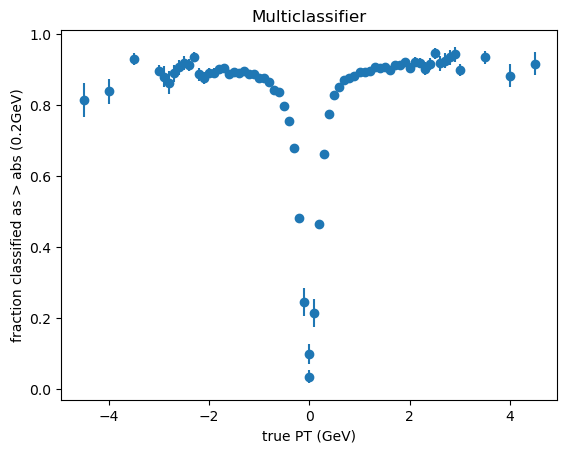

In [64]:
plt.errorbar(xvaluesArray, yvaluesArray, yerr=errorArray, fmt="o")
plt.title('Multiclassifier')
plt.xlabel('true PT (GeV)')
plt.ylabel('fraction classified as > abs (0.2GeV)')
plt.savefig('multiclassifier_turnonCurve.png')